<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K=1  Train Acc=1.000  Test Acc=0.967  Time=0.2817s
K=3  Train Acc=0.942  Test Acc=1.000  Time=0.3077s
K=5  Train Acc=0.958  Test Acc=1.000  Time=0.3510s
K=7  Train Acc=0.958  Test Acc=1.000  Time=0.3447s
K=9  Train Acc=0.950  Test Acc=1.000  Time=0.3374s
K=11  Train Acc=0.958  Test Acc=1.000  Time=0.3992s
K=13  Train Acc=0.958  Test Acc=1.000  Time=0.3239s
K=15  Train Acc=0.958  Test Acc=1.000  Time=0.3824s


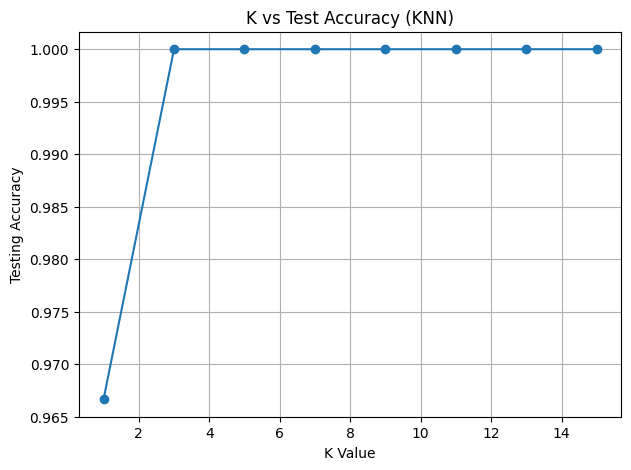

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -------------------------------------------
# 1. KNN FROM SCRATCH
# -------------------------------------------

class MyKNN:
    def __init__(self, k=3):
        self.k = k

    # Euclidean distance
    def distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    # Fit = store training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Predict for ONE sample
    def predict_one(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))

        # sort by distance
        distances.sort(key=lambda x: x[0])

        # take top K
        neighbors = distances[:self.k]

        # majority vote
        labels = [label for _, label in neighbors]
        return max(set(labels), key=labels.count)

    # Predict for ALL samples
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            predictions.append(self.predict_one(x))
        return np.array(predictions)

    # Accuracy
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


# -------------------------------------------
# 2. LOAD AND PREPROCESS DATA
# -------------------------------------------

iris = load_iris()
X = iris.data
y = iris.target

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -------------------------------------------
# 3. TEST DIFFERENT K VALUES
# -------------------------------------------

k_values = list(range(1, 16, 2))   # 1,3,5,...15
train_acc_list = []
test_acc_list = []
time_list = []

for k in k_values:
    model = MyKNN(k=k)

    start = time.time()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end = time.time()

    train_acc = model.accuracy(y_train, y_pred_train)
    test_acc = model.accuracy(y_test, y_pred_test)
    duration = end - start

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    time_list.append(duration)

    print(f"K={k}  Train Acc={train_acc:.3f}  Test Acc={test_acc:.3f}  Time={duration:.4f}s")


# -------------------------------------------
# 4. PLOT ACCURACY vs K
# -------------------------------------------

plt.figure(figsize=(7,5))
plt.plot(k_values, test_acc_list, marker="o")
plt.xlabel("K Value")
plt.ylabel("Testing Accuracy")
plt.title("K vs Test Accuracy (KNN)")
plt.grid(True)
plt.show()
